In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# loading datasets
X_train = pd.read_csv("kdd99_training_data.csv")
X_test = pd.read_csv("kdd99_testing_data.csv")
y_train = pd.read_csv("kdd99_training_labels.csv")
y_test = pd.read_csv("kdd99_testing_labels.csv")
y_train=y_train.label.astype(str)
y_test=y_test.label.astype(str)
X_train=X_train.astype(str)
y_train=y_train.astype(str)
# X_train=X_train.sample(n=25000).astype(str)
# y_train=y_train.sample(n=25000).astype(str)
# X_test=X_test.sample(n=8333)
# y_test=y_test.sample(n=8333)
print(y_train.shape)
print(X_test.shape)
print(y_train.unique())

(370515,)
(123505, 32)
['normal' 'dos' 'r2l' 'probe' 'u2r']


In [3]:
#Normalizing the data
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
# Training the data using Knn
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     97676
      normal       1.00      1.00      1.00     24482
       probe       0.99      0.99      0.99      1056
         r2l       0.97      0.98      0.97       279
         u2r       0.64      0.58      0.61        12

    accuracy                           1.00    123505
   macro avg       0.92      0.91      0.91    123505
weighted avg       1.00      1.00      1.00    123505



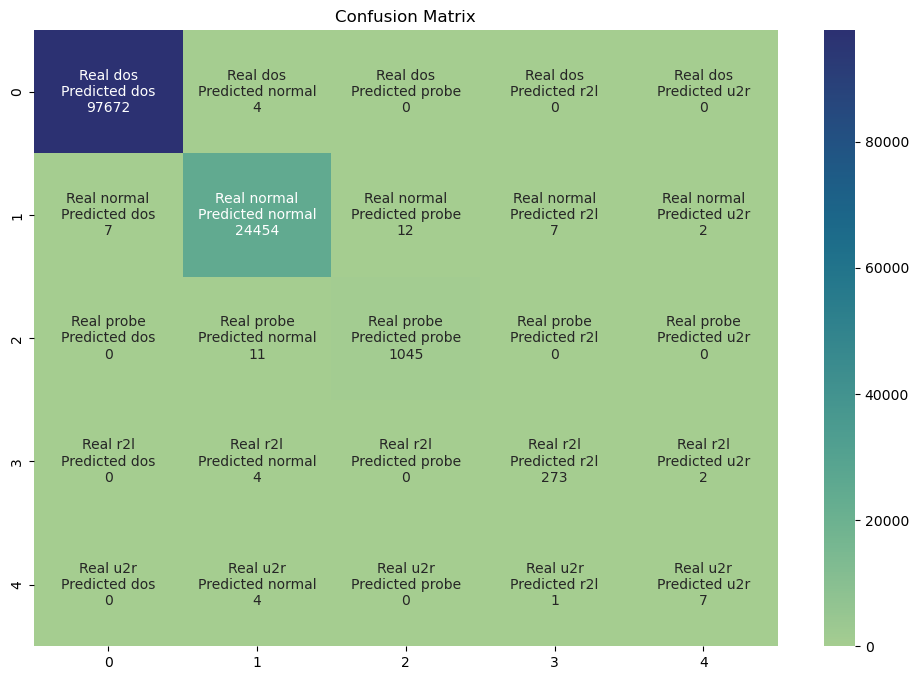

In [5]:
# We print out the results for k=1
# Building confusion matrix and printing classification report
conf_matrix = confusion_matrix(y_test, pred)
print(classification_report(y_test,pred))

# building annotations
y_labels = ['dos', 'normal', 'probe', 'r2l', 'u2r']
labels = []
for i in range(5):
  for j in range(5):
    labels.append(str(f"Real {y_labels[i]}\nPredicted {y_labels[j]}\n{conf_matrix[i, j]}"))

labels = np.asarray(labels).reshape(5, 5)

# confusion matrix visualization
plt.figure(figsize=(12, 8))
plt.title("Confusion Matrix")
sns.heatmap(conf_matrix, annot=labels, cmap='crest', fmt='')
plt.show()
     